# Informer

## Download code and dataset

In [1]:
# !git clone https://github.com/zhouhaoyi/Informer2020.git
# !git clone https://github.com/zhouhaoyi/ETDataset.git
# !ls

Cloning into 'Informer2020'...
remote: Enumerating objects: 576, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 576 (delta 0), reused 2 (delta 0), pack-reused 573
Receiving objects: 100% (576/576), 6.49 MiB | 13.61 MiB/s, done.
Resolving deltas: 100% (328/328), done.
Cloning into 'ETDataset'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 187 (delta 25), reused 20 (delta 20), pack-reused 159
Receiving objects: 100% (187/187), 3.86 MiB | 8.77 MiB/s, done.
Resolving deltas: 100% (62/62), done.
ETDataset  Informer2020  fdd-defense.zip  myInformer.ipynb  shares
ETTh1.csv  data		 fgsm.ipynb	  quick-start


In [37]:
import sys
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

In [3]:
# !pip install -r ./Informer2020/requirements.txt

## Experiments: Train and Test

In [38]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [49]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'ETTh1' # data
args.root_path = './' # root path of data file
args.data_path = 'ETTh1.csv' # data file

############################## ### #
args.features = 'MS' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'OT' # target feature in S or MS task
args.freq = 'h' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 96 # input sequence length of Informer encoder №№№№№№№№№№
args.label_len = 48 # start token length of Informer decoder
args.pred_len = 24 # prediction sequence length  №№№№№№№№№№№№№№№№№№№№№№№№№№
# args.seq_len = 96 # input sequence length of Informer encoder №№№№№№№№№№
# args.label_len = 48 # start token length of Informer decoder
# args.pred_len = 24 # prediction sequence length  №№№№№№№№№№№№№№№№№№№№№№№№№№
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 7 # encoder input size
args.dec_in = 7 # decoder input size
args.c_out = 7 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'h'


# args.inverse = True

args.batch_size = 32
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 10  ###############################################################
args.patience = 3
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = False
args.devices = '0,1,2,3'


In [50]:
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ','')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]

In [51]:
# Set augments by using data name
data_parser = {
    'ETTh1':{'data':'ETTh1.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
    'WTH':{'data':'WTH.csv','T':'WetBulbCelsius','M':[7,7,7],'S':[1,1,1],'MS':[12,12,1]},
    'ETTm1':{'data':'ETTm1.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
    'ETTm2':{'data':'ETTm2.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
}
if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

In [52]:
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [53]:
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'ETTh1', 'root_path': './', 'data_path': 'ETTh1.csv', 'features': 'MS', 'target': 'OT', 'freq': 'h', 'checkpoints': './informer_checkpoints', 'seq_len': 96, 'label_len': 48, 'pred_len': 24, 'enc_in': 7, 'dec_in': 7, 'c_out': 1, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 10, 'patience': 3, 'des': 'exp', 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3', 'detail_freq': 'h'}


In [54]:
Exp = Exp_Informer

In [55]:
for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features,
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)

    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)

    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
>>>>>>>start training : informer_ETTh1_ftMS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 12075
val 2590
test 2590
	iters: 100, epoch: 1 | loss: 0.1416531
	speed: 0.0427s/iter; left time: 156.7189s
	iters: 200, epoch: 1 | loss: 0.1450227
	speed: 0.0434s/iter; left time: 154.9818s
	iters: 300, epoch: 1 | loss: 0.1107958
	speed: 0.0436s/iter; left time: 151.3150s
Epoch: 1 cost time: 16.319339275360107
Epoch: 1, Steps: 377 | Train Loss: 0.1751459 Vali Loss: 0.2512627 Test Loss: 0.0948459
Validation loss decreased (inf --> 0.251263).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.1119680
	speed: 0.0999s/iter; left time: 328.9414s
	iters: 200, epoch: 2 | loss: 0.0698031
	speed: 0.0421s/iter; left time: 134.3887s
	iters: 300, epoch: 2 | loss: 0.0773408
	speed: 0.0425s/iter; left time: 131.5072s
Epoch: 2 cost time: 15.937740087509155
Epoch: 2, Steps: 377 | Train Loss: 0.0931824

In [ ]:
# torch.save(vae.state_dict(), 'vae_1000_2')

# Metrics

In [ ]:
# here is the detailed code of function predict

def predict(exp, setting, sample, load=True): ############################### Added sample!
    pred_data, pred_loader = exp._get_data(flag='pred', sample=sample)

    if load:
        path = os.path.join(exp.args.checkpoints, setting)
        best_model_path = path+'/'+'checkpoint.pth'
        exp.model.load_state_dict(torch.load(best_model_path))

    exp.model.eval()

    preds = []

    for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(pred_loader):
        batch_x = batch_x.float().to(exp.device)
        batch_y = batch_y.float()
        batch_x_mark = batch_x_mark.float().to(exp.device)
        batch_y_mark = batch_y_mark.float().to(exp.device)

        # decoder input
        if exp.args.padding==0:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        elif exp.args.padding==1:
            dec_inp = torch.ones([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        else:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        dec_inp = torch.cat([batch_y[:,:exp.args.label_len,:], dec_inp], dim=1).float().to(exp.device)
        # encoder - decoder
        if exp.args.use_amp:
            with torch.cuda.amp.autocast():
                if exp.args.output_attention:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
                else:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        else:
            if exp.args.output_attention:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
            else:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        f_dim = -1 if exp.args.features=='MS' else 0
        batch_y = batch_y[:,-exp.args.pred_len:,f_dim:].to(exp.device)

        pred = outputs.detach().cpu().numpy()#.squeeze()

        preds.append(pred)

    preds = np.array(preds)
    preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])

    # result save
    folder_path = './results/' + setting +'/'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    np.save(folder_path+'real_prediction.npy', preds)

    return preds

In [64]:
from torch.utils.data import Dataset, DataLoader
import torch

class SlidingDataset(Dataset):
    def __init__(self, ts, window_size):
        self.window_size = window_size
        self.seq = ts

    def __len__(self):
        return len(self.seq) - self.window_size

    def __getitem__(self, idx):
        return self.seq[idx: idx + self.window_size]

In [65]:
dataset = SlidingDataset(val_data, window_size=96+24)

In [60]:
len(dataset)

2493

In [61]:
96+24

120

In [21]:
sample

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
14304,2018-02-17 00:00:00,10.248,1.273,7.214,0.391,2.955,0.457,4.573
14305,2018-02-17 01:00:00,8.372,1.005,5.899,0.249,2.437,0.457,4.010
14306,2018-02-17 02:00:00,7.502,1.005,5.295,0.178,2.224,0.457,4.150
14307,2018-02-17 03:00:00,6.966,0.804,4.833,0.107,2.071,0.457,4.995
14308,2018-02-17 04:00:00,6.832,0.804,4.762,0.142,2.071,0.426,4.362
...,...,...,...,...,...,...,...,...
14802,2018-03-09 18:00:00,9.645,1.674,6.538,0.675,3.168,0.609,6.613
14803,2018-03-09 19:00:00,9.578,1.273,6.219,0.320,3.381,0.609,5.698
14804,2018-03-09 20:00:00,10.985,2.813,7.427,1.492,3.655,0.883,5.487
14805,2018-03-09 21:00:00,11.588,2.880,8.209,1.564,3.350,0.822,5.135


In [62]:
train_data[dset.columns[-1]]

0        30.531000
1        27.787001
2        27.787001
3        25.044001
4        21.948000
           ...    
11853    10.693000
11854    10.763000
11855    10.622000
11856    10.482000
11857    10.271000
Name: OT, Length: 11858, dtype: float64

In [68]:
val_data.values.shape

(2613, 8)

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from sklearn.preprocessing import StandardScaler

dset = pd.read_csv('ETTh1.csv')

num_train = int(len(dset) * 0.7)
num_val = int(len(dset) * 0.15)
num_test = int(len(dset) * 0.15)

val_data = dset[num_train : num_train + num_val]

dataset = SlidingDataset(val_data, window_size=120) ###################################### -1

num_train = int(len(dset) * 0.7)

train_data = dset[0:num_train - 96]
scaler = StandardScaler()
scaler.fit(train_data[dset.columns[-1]].values.reshape(-1, 1))

mses, maes = [], []
for i,sample in tqdm(enumerate(dataset)):
    
    
    x, y_true = sample[:96], sample[96:].iloc[:,-1].values

    y_pred = scaler.inverse_transform(predict(exp, setting, sample=x, load=True).reshape(24,1)) # y_pred.shape: [24] ##############   load!!!

    mses.append(mean_squared_error(y_true, y_pred))
    maes.append(mean_absolute_error(y_true, y_pred))
    
    # break ######################################################################################
    
    if i == len(dataset)-1:
        break

print('Mean MSE:', np.mean(mses))
print('Mean MAE:', np.mean(maes))

2492it [05:24,  7.68it/s]

Mean MSE: 18.719214549897544
Mean MAE: 3.771548939497972


In [67]:
np.save('mses_inform.npy', mses)

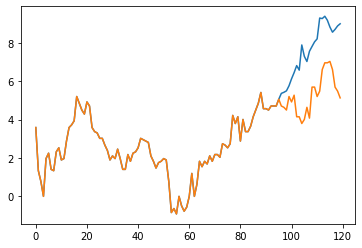

In [69]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.concatenate([x['OT'].values,y_pred.squeeze(-1)]))
plt.plot(np.concatenate([x['OT'].values,y_true]))
plt.show()

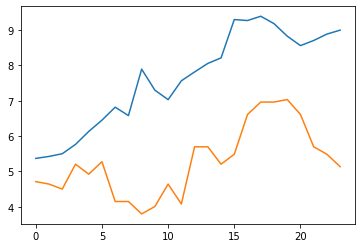

In [68]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(y_pred)
plt.plot(y_true)
plt.show()

In [70]:
### TEST

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from sklearn.preprocessing import StandardScaler

dset = pd.read_csv('ETTh1.csv')

num_train = int(len(dset) * 0.7)
num_val = int(len(dset) * 0.15)
num_test = int(len(dset) * 0.15)


test_data = dset[num_train + num_val:]

dataset = SlidingDataset(test_data, window_size=120) ###################################### -1

num_train = int(len(dset) * 0.7)

train_data = dset[0:num_train - 96]
scaler = StandardScaler()
scaler.fit(train_data[dset.columns[-1]].values.reshape(-1, 1))

mses, maes = [], []
for i,sample in tqdm(enumerate(dataset)):
    
    
    x, y_true = sample[:96], sample[96:].iloc[:,-1].values

    y_pred = scaler.inverse_transform(predict(exp, setting, sample=x, load=True).reshape(24,1)) # y_pred.shape: [24] ##############   load!!!

    mses.append(mean_squared_error(y_true, y_pred))
    maes.append(mean_absolute_error(y_true, y_pred))
    
    # break ######################################################################################
    
    if i == len(dataset)-1:
        break

print('Mean MSE:', np.mean(mses))
print('Mean MAE:', np.mean(maes))

2492it [05:21,  7.75it/s]

Mean MSE: 6.829858477113687
Mean MAE: 2.00619241879783


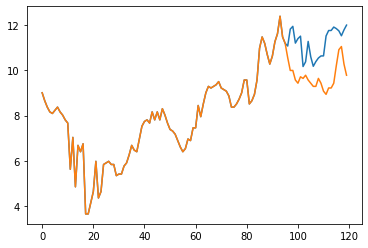

In [71]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.concatenate([x['OT'].values,y_pred.squeeze(-1)]))
plt.plot(np.concatenate([x['OT'].values,y_true]))
plt.show()

## Generated data vae

In [69]:
val_data[:120]['date']

12194    2017-11-21 02:00:00
12195    2017-11-21 03:00:00
12196    2017-11-21 04:00:00
12197    2017-11-21 05:00:00
12198    2017-11-21 06:00:00
                ...         
12693    2017-12-11 21:00:00
12694    2017-12-11 22:00:00
12695    2017-12-11 23:00:00
12696    2017-12-12 00:00:00
12697    2017-12-12 01:00:00
Name: date, Length: 504, dtype: object

In [73]:
dset_numpy = np.load('vae_generated.npy')
df = pd.DataFrame(dset_numpy[0], columns=dset.columns[1:])
date = val_data[:120]['date']
df.insert(0, 'date', date.values)
df

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2017-11-21 02:00:00,11.591135,3.261396,8.368284,1.777897,3.191117,0.908301,4.169557
1,2017-11-21 03:00:00,10.696733,2.158862,7.744921,0.983497,2.883284,0.696618,4.065534
2,2017-11-21 04:00:00,10.512268,2.378364,7.729901,1.143582,2.738585,0.700899,3.474173
3,2017-11-21 05:00:00,9.476730,1.875755,6.746197,0.800635,2.675065,0.587571,4.134691
4,2017-11-21 06:00:00,8.577170,1.658181,6.482329,0.729567,2.341952,0.549468,3.702732
...,...,...,...,...,...,...,...,...
115,2017-11-25 21:00:00,10.759835,2.877248,6.890652,1.412620,3.830852,0.978947,3.398002
116,2017-11-25 22:00:00,11.152911,2.638870,7.496938,1.297168,3.768311,0.953486,4.002291
117,2017-11-25 23:00:00,13.417835,3.326422,9.075990,1.310258,4.501578,0.958516,2.854347
118,2017-11-26 00:00:00,11.676733,2.808215,8.585544,1.421118,3.532031,0.810571,4.213661


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from sklearn.preprocessing import StandardScaler

dsett = pd.read_csv('ETTh1.csv')

dset_numpy = np.load('vae_generated.npy')

num_train = int(len(dsett) * 0.7)
num_val = int(len(dsett) * 0.15)
num_test = int(len(dsett) * 0.15)
val_data = dsett[num_train : num_train + num_val]
date = val_data[:120].index

 ###################################### -1

train_data = dsett[0:num_train - 96]
scaler = StandardScaler()
scaler.fit(train_data[dsett.columns[-1]].values.reshape(-1, 1))

mses, maes = [], []
for sample in tqdm(dset_numpy):
    
    sample = pd.DataFrame(sample, columns=dsett.columns[1:])
    sample.insert(0, 'date', date.values)
    
    x, y_true = sample[:96], sample[96:].iloc[:,-1].values

    y_pred = scaler.inverse_transform(predict(exp, setting, sample=x, load=True).reshape(24,1)) # y_pred.shape: [24] ##############   load!!!

    mses.append(mean_squared_error(y_true, y_pred))
    maes.append(mean_absolute_error(y_true, y_pred))
    
    # break ######################################################################################
    

print('Mean MSE:', np.mean(mses))
print('Mean MAE:', np.mean(maes))

100%|██████████| 4986/4986 [10:56<00:00,  7.59it/s]

Mean MSE: 16.021555459285278
Mean MAE: 3.7057500745065357


In [77]:
np.save('mses_inform_vae.npy', mses)

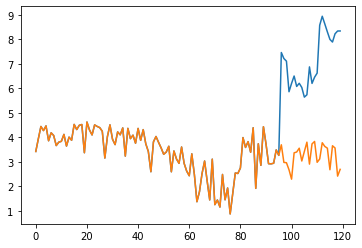

In [76]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.concatenate([x['OT'].values,y_pred.squeeze(-1)]))
plt.plot(np.concatenate([x['OT'].values,y_true]))
plt.show()

In [78]:
dset_numpy = np.load('gan_generated.npy')
df = pd.DataFrame(dset_numpy[0], columns=dset.columns[1:])
date = val_data[:120]['date']
df.insert(0, 'date', date.values)
df

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2017-11-21 02:00:00,11.624358,3.417839,8.959540,1.927082,3.213763,0.904882,4.528800
1,2017-11-21 03:00:00,10.843898,2.907850,7.725865,1.476253,2.857892,0.915651,4.303661
2,2017-11-21 04:00:00,10.993249,3.057151,7.969806,1.682486,3.143816,0.927704,4.580933
3,2017-11-21 05:00:00,7.339261,2.777120,3.617943,1.354014,3.366430,0.988716,4.382719
4,2017-11-21 06:00:00,11.324687,3.500900,8.674928,1.947599,3.212102,0.986405,4.230444
...,...,...,...,...,...,...,...,...
115,2017-11-25 21:00:00,0.118623,2.112629,-3.388466,0.467091,2.427205,1.494797,3.167577
116,2017-11-25 22:00:00,6.835548,2.442701,2.715356,0.451025,2.945565,1.470108,3.173904
117,2017-11-25 23:00:00,11.586795,3.169444,7.845727,0.987542,4.101616,1.437508,3.995666
118,2017-11-26 00:00:00,13.600821,3.750574,10.331362,1.564482,4.839399,1.221372,4.131754


In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from sklearn.preprocessing import StandardScaler

dsett = pd.read_csv('ETTh1.csv')

dset_numpy = np.load('gan_generated.npy')

num_train = int(len(dsett) * 0.7)
num_val = int(len(dsett) * 0.15)
num_test = int(len(dsett) * 0.15)
val_data = dsett[num_train : num_train + num_val]
date = val_data[:120].index

 ###################################### -1

train_data = dsett[0:num_train - 96]
scaler = StandardScaler()
scaler.fit(train_data[dsett.columns[-1]].values.reshape(-1, 1))

mses, maes = [], []
for sample in tqdm(dset_numpy):
    
    sample = pd.DataFrame(sample, columns=dsett.columns[1:])
    sample.insert(0, 'date', date.values)
    
    x, y_true = sample[:96], sample[96:].iloc[:,-1].values

    y_pred = scaler.inverse_transform(predict(exp, setting, sample=x, load=True).reshape(24,1)) # y_pred.shape: [24] ##############   load!!!

    mses.append(mean_squared_error(y_true, y_pred))
    maes.append(mean_absolute_error(y_true, y_pred))
    
    # break ######################################################################################
    

print('Mean MSE:', np.mean(mses))
print('Mean MAE:', np.mean(maes))

100%|██████████| 4986/4986 [10:52<00:00,  7.64it/s]

Mean MSE: 20.245630451975888
Mean MAE: 3.920005164160246


In [80]:
np.save('mses_inform_gan.npy', mses)

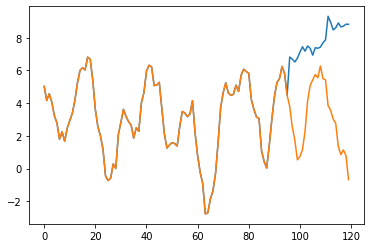

In [82]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.concatenate([x['OT'].values,y_pred.squeeze(-1)]))
plt.plot(np.concatenate([x['OT'].values,y_true]))
plt.show()